## Равномерное распределение

### Генерация

In [ ]:
from numpy.random import default_rng
N = 200
rng = default_rng()
values = rng.random(N)
values

array([0.85196514, 0.26675418, 0.57193709, 0.23084989, 0.71854767,
       0.20272184, 0.53601076, 0.14188727, 0.22564886, 0.386959  ,
       0.7305184 , 0.6350482 , 0.50671964, 0.21308686, 0.1552852 ,
       0.21369326, 0.41582358, 0.99052757, 0.19742189, 0.42935334,
       0.32809783, 0.09604418, 0.4945881 , 0.21984673, 0.82140343,
       0.69714565, 0.70020816, 0.40722764, 0.48096584, 0.88398638,
       0.06813165, 0.12393884, 0.8594743 , 0.75745702, 0.61115165,
       0.27962359, 0.07908877, 0.05257843, 0.99344291, 0.36630323,
       0.18454499, 0.8098878 , 0.76312445, 0.62247657, 0.46793729,
       0.83982177, 0.52789747, 0.23386733, 0.52331591, 0.96769797,
       0.72536348, 0.03018929, 0.91587119, 0.30920834, 0.43738644,
       0.67321577, 0.12209038, 0.44230429, 0.32776277, 0.60442494,
       0.27614306, 0.63069374, 0.0609201 , 0.51351134, 0.37958284,
       0.54280533, 0.7475931 , 0.42495826, 0.50573647, 0.9767325 ,
       0.11929823, 0.67191964, 0.04052878, 0.37080661, 0.22908

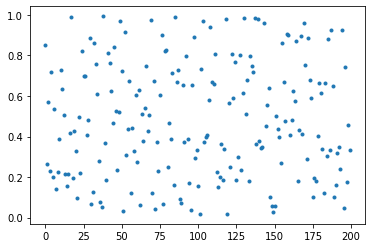

In [ ]:
import matplotlib.pyplot as plt
plt.plot(values, '.')

### Визуализация

(array([17., 23., 20., 27., 20., 16., 24., 17., 17., 19.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

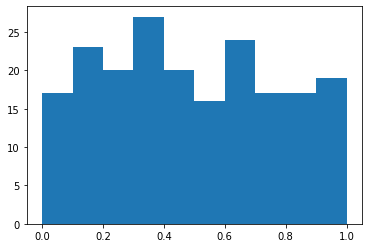

In [ ]:
# гистограмма
plt.hist(values, range=(0,1))

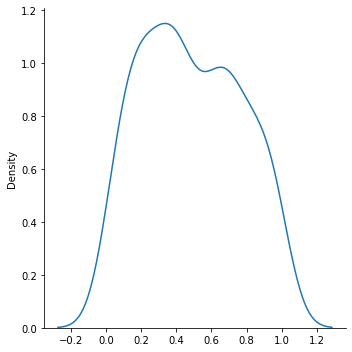

In [ ]:
# Ядерная оценка плотности
import seaborn as sns
sns.displot(values, kind='kde')

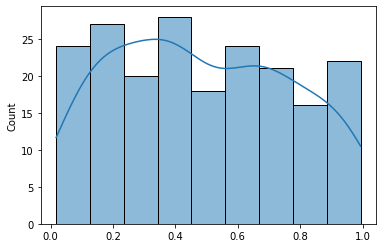

In [ ]:
import seaborn as sns
sns.histplot(values, kde=True)

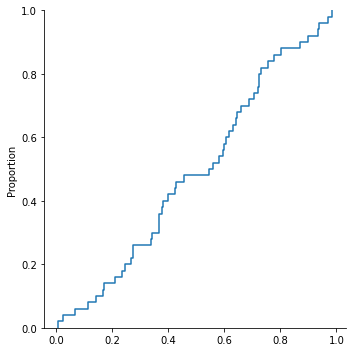

In [ ]:
# Эмпирическая функция распределения
import seaborn as sns
sns.displot(values, kind='ecdf')

## Показательное (экспоненциальное) распределение

### Генерация

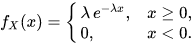

scale = 1 / lambda

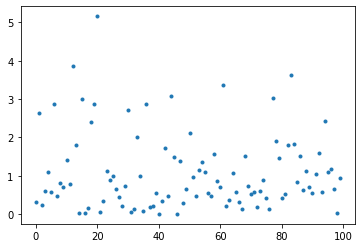

In [ ]:
N = 100
scale = 1
values = rng.exponential(scale=scale, size=N)
plt.plot(values, '.')

### Плотность распределения

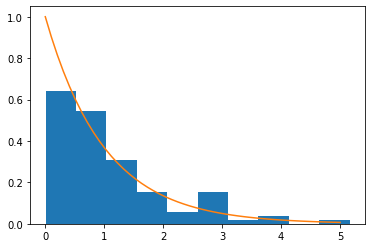

In [ ]:
import numpy as np
plt.hist(values, density=True)
x = np.linspace(0, 5)
plt.plot(x, np.exp(-x))

### Функция распределения

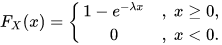

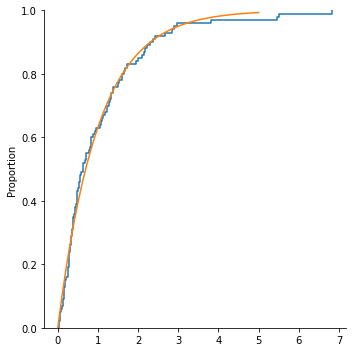

In [ ]:
import seaborn as sns
sns.displot(values, kind='ecdf')
plt.plot(x, 1 - np.exp(-x))

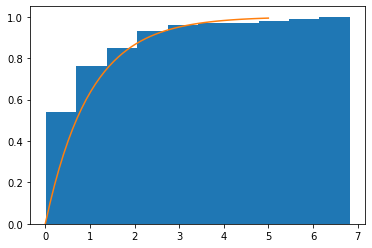

In [ ]:
plt.hist(values, density=True, cumulative=True)
x = np.linspace(0, 5)
plt.plot(x, 1 - np.exp(-x))

### Генерация через (обратную) функцию распределения

y = 1 - exp(-x)

exp(-x) = 1 - y

x = -ln(1 - y)

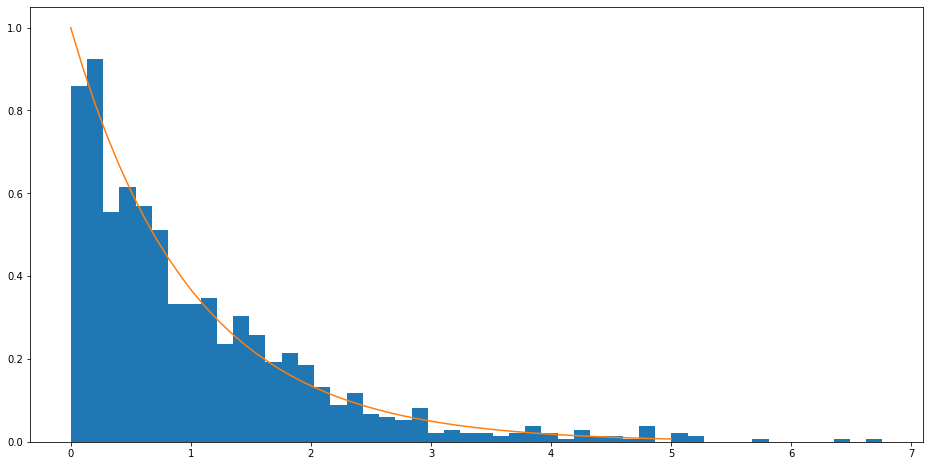

In [ ]:
plt.figure(figsize=(16, 8))
plt.hist(-np.log(1 - rng.random(1000)), density=True, bins=50)
x = np.linspace(0, 5)
plt.plot(x, np.exp(-x))

## Модуль scipy.stat
- больше распределений
- больше параметров
- информация о распределениях

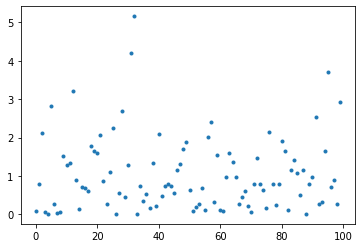

In [ ]:
from scipy.stats import expon
N = 100
scale = 1
distribution = expon(scale=scale)
values = distribution.rvs(N, rng)
plt.plot(values, '.')

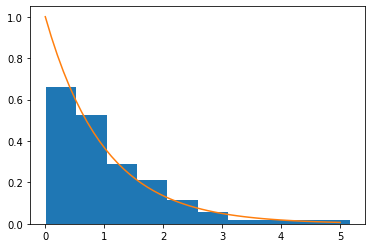

In [ ]:
import numpy as np
plt.hist(values, density=True)
x = np.linspace(0, 5)
plt.plot(x, distribution.pdf(x))

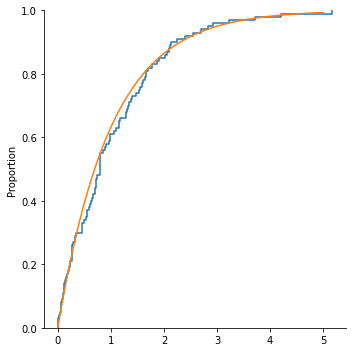

In [ ]:
sns.displot(values, kind='ecdf')
plt.plot(x, distribution.cdf(x))

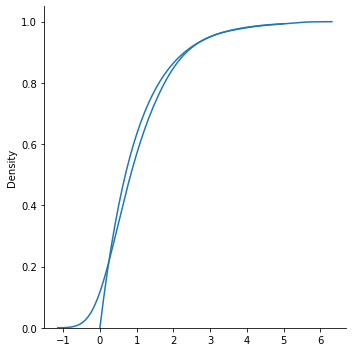

In [ ]:
sns.displot(values, kind='kde', cumulative=True)
plt.plot(x, distribution.cdf(x))

## Хи-квадрат

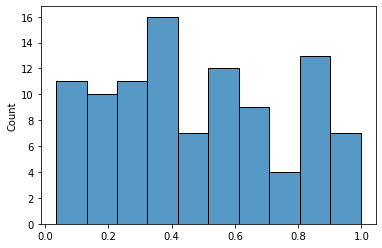

In [ ]:
N = 100
n_bin = 10
values = rng.random(N)
sns.histplot(values, bins=n_bin)

In [ ]:
freqs, bins = np.histogram(values, range=(0, 1), bins=n_bin)
freqs, bins

(array([ 9, 10, 13, 10, 13, 11,  9,  5, 13,  7]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]))

In [ ]:
expected = N/n_bin
expected

10.0

In [ ]:
from scipy.stats import chisquare
chisquare(freqs, expected)

Power_divergenceResult(statistic=6.4, pvalue=0.6993125708664081)

In [ ]:
distribution = expon()
expected = np.diff(distribution.cdf(bins))
expected = expected/expected.sum() * N

(array([15.0544988 , 13.62187383, 12.32558114, 11.15264702, 10.09133233,
         9.13101509,  8.26208412,  7.47584286,  6.76442235,  6.12070246]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

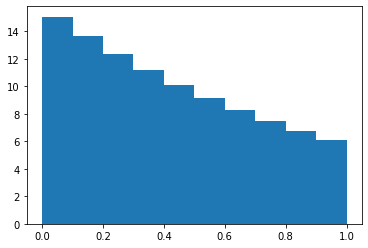

In [ ]:
plt.hist(x=(bins[:-1]+bins[1:])/2, bins=bins, weights=expected)

(array([ 9., 10., 13., 10., 13., 11.,  9.,  5., 13.,  7.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

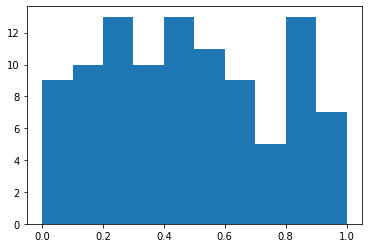

In [ ]:
plt.hist(values, bins=bins)

In [ ]:
chisquare(freqs, expected)

Power_divergenceResult(statistic=11.535170859784198, pvalue=0.24079980926439704)

Кто видит большую проблему с гистограммой?

(array([39.61385005, 24.02701461, 14.57312102,  8.83904471,  5.36115162,
         3.25170283,  1.97225746,  1.19623462,  0.72555297,  0.44007012]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

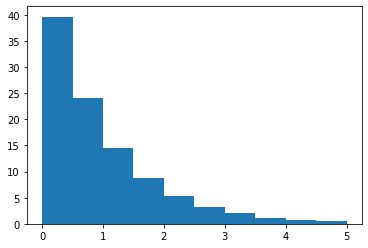

In [ ]:
freqs, bins = np.histogram(values, range=(0, 5), bins=n_bin)
expected = np.diff(distribution.cdf(bins))
expected = expected/expected.sum() * N
plt.hist(x=(bins[:-1]+bins[1:])/2, bins=bins, weights=expected)

(array([55., 45.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

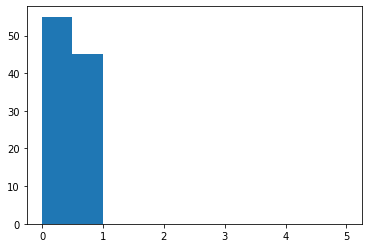

In [ ]:
plt.hist(values, bins=bins)

In [ ]:
chisquare(freqs, expected)

Power_divergenceResult(statistic=60.642314872342084, pvalue=1.0080262614258623e-09)

## Фит

(array([ 2.,  3., 12.,  7., 16., 16., 18., 11., 10.,  5.]),
 array([-4.22342806, -3.28159466, -2.33976126, -1.39792786, -0.45609447,
         0.48573893,  1.42757233,  2.36940573,  3.31123912,  4.25307252,
         5.19490592]),
 <a list of 10 Patch objects>)

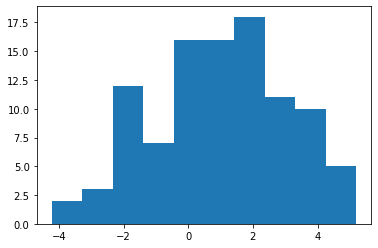

In [ ]:
from scipy.stats import norm
N = 100
scale = 2.0
loc = 1.0
distribution = norm(loc, scale)
values = distribution.rvs(N, rng)
plt.hist(values)

In [ ]:
loc, scale = norm.fit(values)
loc, scale

(0.976795172399036, 1.8390687865692437)

(array([ 0.68661752,  2.78078587,  7.93535896, 15.96143738, 22.63580027,
        22.63580027, 15.96143738,  7.93535896,  2.78078587,  0.68661752]),
 array([-5. , -3.8, -2.6, -1.4, -0.2,  1. ,  2.2,  3.4,  4.6,  5.8,  7. ]),
 <a list of 10 Patch objects>)

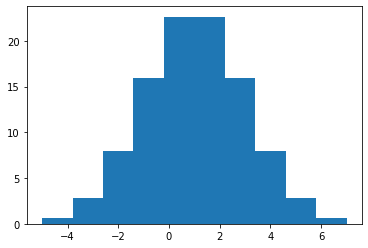

In [ ]:
n_bin = 10
distribution = norm(loc, scale)
freqs, bins = np.histogram(values, range=(-5, 7), bins=n_bin)
expected = np.diff(distribution.cdf(bins))
expected = expected/expected.sum() * N
plt.hist(x=(bins[:-1]+bins[1:])/2, bins=bins, weights=expected)

(array([ 2.,  2., 12., 12., 20., 23., 18.,  8.,  3.,  0.]),
 array([-5. , -3.8, -2.6, -1.4, -0.2,  1. ,  2.2,  3.4,  4.6,  5.8,  7. ]),
 <a list of 10 Patch objects>)

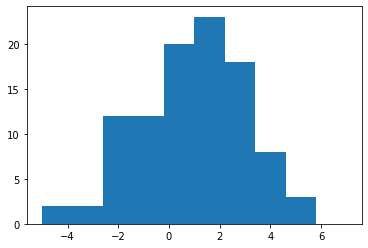

In [ ]:
plt.hist(values, bins=bins)

In [ ]:
chisquare(freqs, expected, ddof=2)

Power_divergenceResult(statistic=7.074241527609566, pvalue=0.42119105139006774)

Зачем нужен ddof?
 - чтобы учесть тот факт, что при оптимизации мы выбирали два параметра распределения - loc и scale